### For each zipcode find which other zipcode they are most and least similar to.  Does this change over time?  If so, how.

We can think of zip code similarities on the basis of complaint type. If two zipdcodes have almost same complaint type count then probabliity of the zip code to be similar is high.
First identify top complaints in total 

In [8]:
# Load it into a Dataframe using pandas
import pandas as pd
path = '311_filtered.csv'
df = pd.read_csv(path, low_memory=False, na_values = ['NO CLUE', 'N/A', '0'])
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,20122810,03/28/2011 11:20:53 AM,04/13/2011 10:40:27 AM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,SCRIE Assistance,Address Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20122811,03/28/2011 11:12:27 PM,03/29/2011 05:07:13 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11216.0,BROOKLYN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.690123,-73.949135,"(40.69012317171803, -73.94913492072885)"
2,20122812,03/28/2011 04:12:08 PM,03/28/2011 08:03:39 PM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,SCRIE Assistance,Senior Address,10012.0,NEW YORK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20122813,03/28/2011 06:25:54 PM,03/28/2011 07:25:59 PM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,SCRIE Assistance,Senior Address,10456.0,BRONX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20122814,03/28/2011 04:16:51 PM,03/28/2011 07:52:23 PM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,SCRIE Assistance,Senior Address,10023.0,NEW YORK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# find top complaint types
top_complaint = df['complaint_type'].groupby(df['complaint_type']).count().sort_values(ascending=False).reset_index(name='count')
top_complaint.head()

,complaint_type,count
0,Noise Residential,1762342
1,HEATHOT WATER,1157250
2,Street Condition,950201
3,Street Light Condition,901576
4,Blocked Driveway,889614


In [16]:
# Keep noise related data in a seperate dataframe
df_noise = df[df['complaint_type'].str.contains("Noise", na=False)]
df_noise['complaint_type'].unique()

array(['Noise  Vehicle', 'Noise  Residential', 'Noise  StreetSidewalk',
       'Noise', 'Noise  Park', 'Noise  Commercial', 'Noise  Helicopter',
       'Noise  House of Worship', 'Noise Survey',
       'Collection Truck Noise'], dtype=object)

In [17]:
# list the names of zips
# Create a list of unique values of districts excluding nulls
zips = [i for i in df_noise['incident_zip'].unique() if pd.notnull(i)]
print('The %d zips of NYC are: \n%s' % (len(zips), zips))

The 235 zips of NYC are: 
[11412.0, 10310.0, 11226.0, 11377.0, 10465.0, 11373.0, 10452.0, 11204.0, 11370.0, 10462.0, 10473.0, 11206.0, 10040.0, 11221.0, 11374.0, 10467.0, 10009.0, 10026.0, 11212.0, 11223.0, 10065.0, 11372.0, 10039.0, 11693.0, 11220.0, 10128.0, 11209.0, 10468.0, 11205.0, 10029.0, 10022.0, 11217.0, 10472.0, 11216.0, 11213.0, 10034.0, 11230.0, 11378.0, 11235.0, 10025.0, 10455.0, 10461.0, 11229.0, 11432.0, 11219.0, 10454.0, 10457.0, 10016.0, 10013.0, 11375.0, 10014.0, 11385.0, 10011.0, 11222.0, 10017.0, 10003.0, 11231.0, 10024.0, 10033.0, 10032.0, 11434.0, 11211.0, 10007.0, 10023.0, 10001.0, 10036.0, 10010.0, 11367.0, 10012.0, 11001.0, 11109.0, 10027.0, 10035.0, 10019.0, 10002.0, 10028.0, 11435.0, 11413.0, 11207.0, 11214.0, 10469.0, 11354.0, 11415.0, 10458.0, 10030.0, 11106.0, 10301.0, 11419.0, 10453.0, 11237.0, 10304.0, 11208.0, 10459.0, 11355.0, 11429.0, 11691.0, 10451.0, 11234.0, 10031.0, 10463.0, 11236.0, 11358.0, 11422.0, 10037.0, 11104.0, 11203.0, 11210.0, 11368.0, 1

In [19]:
noise_freq = df_noise['complaint_type'].groupby(df_noise['complaint_type']).count().sort_values(ascending=False).reset_index(name='count')
noise_freq

,complaint_type,count
0,Noise Residential,1762342
1,Noise,469916
2,Noise StreetSidewalk,462639
3,Noise Commercial,341506
4,Noise Vehicle,210541
5,Noise Park,35084
6,Noise Survey,16303
7,Noise Helicopter,10933
8,Noise House of Worship,9590
9,Collection Truck Noise,1706


In [32]:
# Save the five most significant noise incidents in a list
noise_list = list(noise_freq['complaint_type'].values)[-5:]
noise_list

['Noise  Park',
 'Noise Survey',
 'Noise  Helicopter',
 'Noise  House of Worship',
 'Collection Truck Noise']

In [20]:
#We will explore which zips have the most noise complaints.
# Keep only the Category and the zips column
df_noise_zips = df_noise.filter(items=['complaint_type', 'incident_zip'])
df_noise_zips = df_noise_zips[df_noise_zips['incident_zip'].isin(zips)]

# List the number of crimes per District
complaint_freq_dist = df_noise_zips.groupby('incident_zip')['incident_zip'].count(
).reset_index(name='count').sort_values(by='count', ascending=0)

# Print the zips with the most noise complaints
print('The zips with the most noise complains are:\n')
complaint_freq_dist = complaint_freq_dist.reset_index().drop('index',axis=1)
complaint_freq_dist.head()

The zips with the most noise complains are:



,incident_zip,count
0,11226.0,63189
1,10031.0,60765
2,10467.0,54756
3,10032.0,53770
4,10040.0,52729


In [22]:
# Keep the most noisy districts in a seperate list.
noisy_zips = [i for i in complaint_freq_dist['incident_zip'][:10]]
noisy_zips

[11226.0,
 10031.0,
 10467.0,
 10032.0,
 10040.0,
 10468.0,
 11211.0,
 10002.0,
 10034.0,
 10452.0]

In [25]:
#focis only on noisy zips
df_noise_focus = df_noise[df_noise['incident_zip'].isin(noisy_zips)]

In [64]:
df_noise_focus = df_noise_focus.dropna(subset=['latitude'])
df_noise_focus = df_noise_focus.dropna(subset=['longitude'])

(-73.99940125637194, -73.85709962963841, 40.63438479278872, 40.893059227007065)

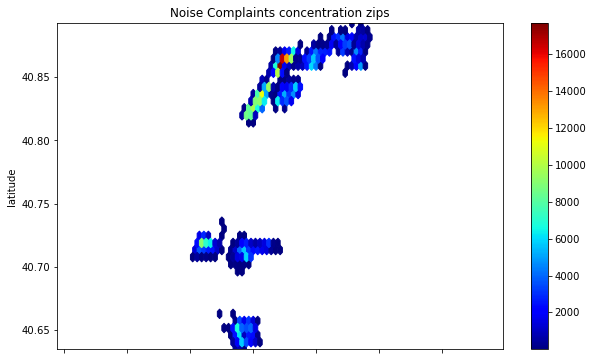

In [75]:
df_noise_focus.plot(kind='hexbin', x='longitude', y='latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Noise Complaints concentration zips', figsize=(10,6)).axis('equal')